In [1]:
from classifier import *
from gan import *
from synthetic_data_generation import *

D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\synthetic_data_generation.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan: GAN = torch.load(model_

Generated 1000 images with label 0.
Generated 1000 images with label 1.
Generated 1000 images with label 2.
Generated 1000 images with label 3.
Generated 1000 images with label 4.
Generated 1000 images with label 5.
Generated 1000 images with label 6.
Generated 1000 images with label 7.
Generated 1000 images with label 8.
Generated 1000 images with label 9.


D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\classifier.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  train_data = torch.tensor(train_data, dtype=torch.float32).to(self.device)


Epoch [10/100], Loss: 1.4631


d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\programming\python\lib\site-packages\sklearn\metrics\_classification.py:13

Test Accuracy: 29.78%
F1 Score: 0.2935
Precision: 0.6718
Recall: 0.2978

Classification Report:
               precision    recall  f1-score   support

           0     0.9188    0.7912    0.8502      1001
           1     0.0000    0.0000    0.0000      1127
           2     0.9346    0.1009    0.1821       991
           3     0.9718    0.2006    0.3325      1032
           4     0.9882    0.0857    0.1577       980
           5     0.0000    0.0000    0.0000       863
           6     0.9943    0.3432    0.5103      1014
           7     0.9223    0.4551    0.6095      1070
           8     0.1204    0.9989    0.2149       944
           9     0.8095    0.0174    0.0340       978

    accuracy                         0.2978     10000
   macro avg     0.6660    0.2993    0.2891     10000
weighted avg     0.6718    0.2978    0.2935     10000

Epoch [20/100], Loss: 0.9291
Test Accuracy: 52.76%
F1 Score: 0.5350
Precision: 0.8242
Recall: 0.5276

Classification Report:
               prec

Test Accuracy: 75.38%
F1 Score: 0.7667
Precision: 0.8480
Recall: 0.7538

Classification Report:
               precision    recall  f1-score   support

           0     0.9429    0.9276    0.9352       980
           1     0.9964    0.4890    0.6560      1135
           2     0.8692    0.7665    0.8146      1032
           3     0.7098    0.8574    0.7767      1010
           4     0.9054    0.8187    0.8599       982
           5     0.9596    0.4260    0.5901       892
           6     0.9412    0.8361    0.8856       958
           7     0.9767    0.7335    0.8378      1028
           8     0.3653    0.9261    0.5240       974
           9     0.7975    0.7691    0.7830      1009

    accuracy                         0.7538     10000
   macro avg     0.8464    0.7550    0.7663     10000
weighted avg     0.8480    0.7538    0.7667     10000



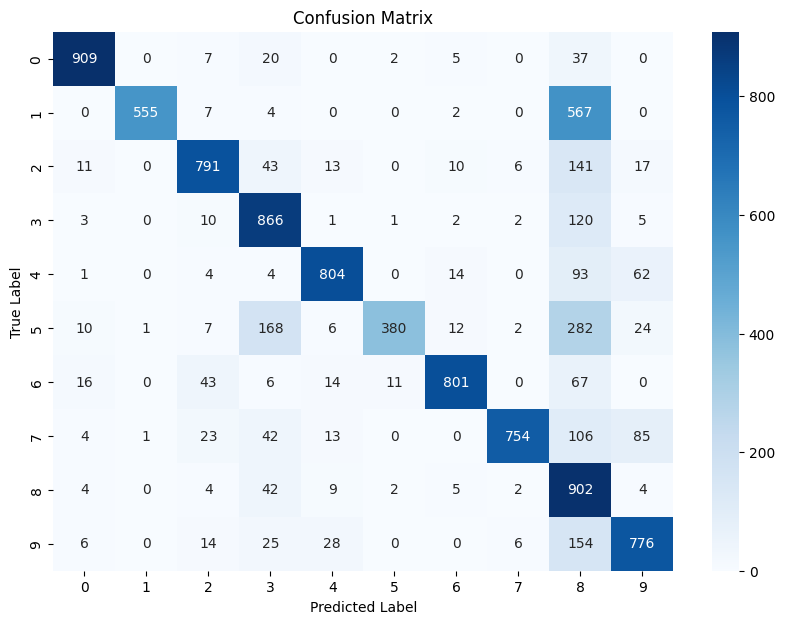

In [2]:
images, labels = generate_synthetic_data()

mnist_classifier = MNISTClassifier(lr=0.001, input_dim=784, output_dim=10, hidden_dim=300, dropout_rate=0.1)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(validation_split=0.2)
train_loader, validation_loader, test_loader = mnist_classifier.load_and_preprocess_data(train_data=images, train_labels=labels, validation_split=0.2)
mnist_classifier.train_model(train_loader=train_loader, validation_loader=validation_loader, num_epochs=500)

torch.save(mnist_classifier, 'saved_models/classifier.pth')

true_labels, pred_labels = mnist_classifier.evaluate_model(test_loader)
mnist_classifier.plot_confusion_matrix(true_labels, pred_labels)